In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
data = pd.read_csv("train.csv")


# data = data.drop("tracking_id",axis=1)
# data = data.drop("datetime",axis=1)

DATA VISUALIZATION/AUGMENTATION

In [ ]:
data.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

we first drop the tracking ID and date time as those value is for reporting only, date time would need weather history data  which we dont have.<br>




In [ ]:
data = data.drop("tracking_id",axis=1)
data = data.drop("datetime",axis=1)

most of the rest numerical, but two variables are categorical values that need to be convert to number.

In [ ]:


#turn 2 categorical into numerical
data['cloud_level'].replace(['Extremely Low', 'Low', 'Medium'],
                        [-1,0, 1], inplace=True)




In [ ]:

data['turbine_status'].replace(['A', 'A2', 'AAA', 'AB', 'ABC', 'AC', 'B', 'B2', 'BA', 'BB', 'BBB', 'BCB', 'BD', 'D'],
                      [1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
#this will not work properly in training because it makes the status have order from low to high,

#using one hot encoding later after fill the nan to indicate nominal



fill nan value in every column

In [ ]:
#every column except turbine status and cloud level
for col in data.columns:
  if col != "turbine_status" and col != "cloud_level":
    data[col].fillna(int(data[col].mean()), inplace=True)
#fill turbine status and cloud level with the middle value in the value set
data['cloud_level'] = data['cloud_level'].fillna(0)
data['turbine_status'] = data['turbine_status'].fillna(value=7)


now we show correlation among the columns

<Axes: >

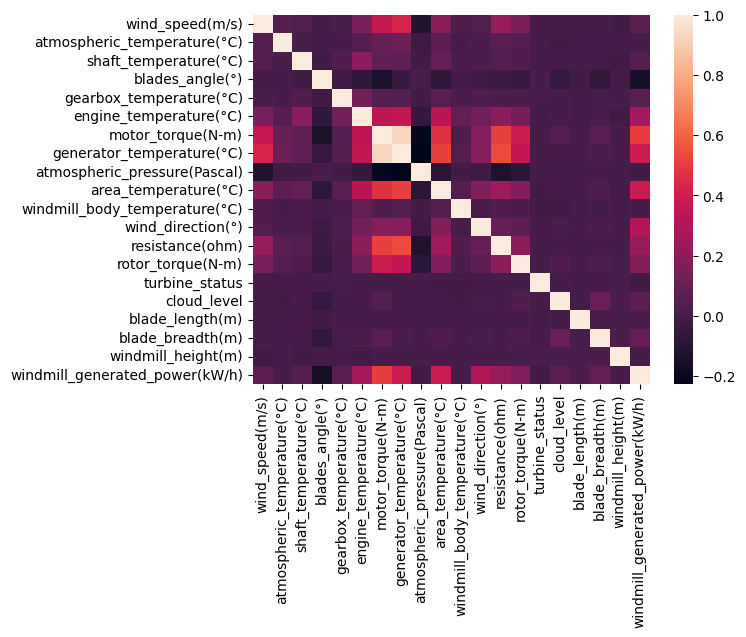

In [ ]:
sn.heatmap(data.corr(),annot=False)

from the heatmap we can spot the squares with high correlation.<br>
to better understand the correlation among the features, we can use Variance Inflation Factor(VIF)<br>
VIF is a measure used to assess multicollinearity in regression analysis. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = data.columns
vif["VIF_Values"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vif)

                         variables  VIF_Values
0                  wind_speed(m/s)    2.262907
1      atmospheric_temperature(°C)    1.013613
2            shaft_temperature(°C)    3.312380
3                  blades_angle(°)    1.135763
4          gearbox_temperature(°C)    1.918789
5           engine_temperature(°C)   47.854620
6                motor_torque(N-m)   51.017400
7        generator_temperature(°C)  118.435783
8     atmospheric_pressure(Pascal)    1.151777
9             area_temperature(°C)   28.367447
10   windmill_body_temperature(°C)    1.168927
11               wind_direction(°)    8.215546
12                 resistance(ohm)   16.026134
13               rotor_torque(N-m)    1.939325
14                  turbine_status    4.512613
15                     cloud_level    1.867126
16                 blade_length(m)    1.047410
17                blade_breadth(m)   29.534349
18              windmill_height(m)   11.272570
19  windmill_generated_power(kW/h)   10.607691


drop columns with VIF higher than 10(except the target) and show heatmap after

<Axes: >

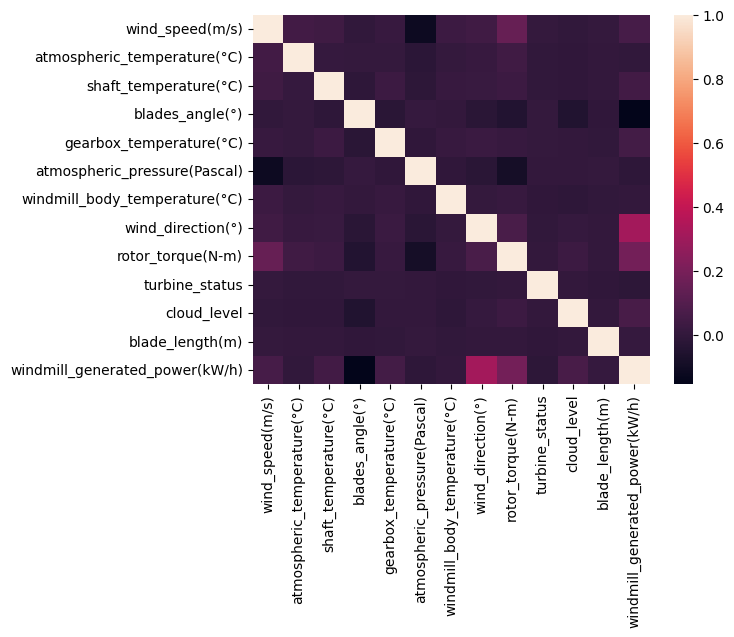

In [ ]:
data = data.drop(['engine_temperature(°C)','motor_torque(N-m)','generator_temperature(°C)','area_temperature(°C)','resistance(ohm)','blade_breadth(m)','windmill_height(m)'],axis=1)
sn.heatmap(data.corr(),annot=False)#7

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 28200 non-null  float64
 1   atmospheric_temperature(°C)     28200 non-null  float64
 2   shaft_temperature(°C)           28200 non-null  float64
 3   blades_angle(°)                 28200 non-null  float64
 4   gearbox_temperature(°C)         28200 non-null  float64
 5   atmospheric_pressure(Pascal)    28200 non-null  float64
 6   windmill_body_temperature(°C)   28200 non-null  float64
 7   wind_direction(°)               28200 non-null  float64
 8   rotor_torque(N-m)               28200 non-null  float64
 9   turbine_status                  28200 non-null  float64
 10  cloud_level                     28200 non-null  float64
 11  blade_length(m)                 28200 non-null  float64
 12  windmill_generated_power(kW/h)  

now we move to outliers(min and max)<br>
first show the min and max values for each column. then manually removes rows that have those value

In [ ]:
for col in data.columns:
  print("min {}: {}".format(col,data[col].min()))
print("\n")
for col in data.columns:
  print("max {}: {}".format(col,data[col].max()))

min wind_speed(m/s): -496.2110288895765
min atmospheric_temperature(°C): -99.0
min shaft_temperature(°C): -99.0
min blades_angle(°): -146.25954269548714
min gearbox_temperature(°C): -244.9740978349033
min atmospheric_pressure(Pascal): -1188624.1314124365
min windmill_body_temperature(°C): -999.0
min wind_direction(°): 0.0
min rotor_torque(N-m): -136.73221690705603
min turbine_status: 1.0
min cloud_level: -1.0
min blade_length(m): -99.0
min windmill_generated_power(kW/h): 0.9623049455000005


max wind_speed(m/s): 601.4556703619595
max atmospheric_temperature(°C): 80.2174435198848
max shaft_temperature(°C): 169.8204551155426
max blades_angle(°): 165.93212322658664
max gearbox_temperature(°C): 999.0
max atmospheric_pressure(Pascal): 1272551.8952618127
max windmill_body_temperature(°C): 323.0
max wind_direction(°): 569.9664787747236
max rotor_torque(N-m): 236.88326419901017
max turbine_status: 14.0
max cloud_level: 1.0
max blade_length(m): 18.209800144412974
max windmill_generated_power(kW

remove the outliers value where they have 99 or 999

In [ ]:
data = data[data['atmospheric_temperature(°C)'] != -99]#8

data = data[data['windmill_body_temperature(°C)'] != -99]
data = data[data['windmill_body_temperature(°C)'] != -999]
data = data[data['windmill_body_temperature(°C)'] != -100.2688756]

data = data[data['shaft_temperature(°C)'] != -99]
data = data[data['blade_length(m)'] != -99]

data = data[data['gearbox_temperature(°C)'] != 999]
data = data[data['atmospheric_pressure(Pascal)'] != -1021641.598734536]


In [ ]:
#working on outliers, eliminate anything with z score >3, meaning anything too far outside the normal distribution
data=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17112 entries, 2 to 28199
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 17112 non-null  float64
 1   atmospheric_temperature(°C)     17112 non-null  float64
 2   shaft_temperature(°C)           17112 non-null  float64
 3   blades_angle(°)                 17112 non-null  float64
 4   gearbox_temperature(°C)         17112 non-null  float64
 5   atmospheric_pressure(Pascal)    17112 non-null  float64
 6   windmill_body_temperature(°C)   17112 non-null  float64
 7   wind_direction(°)               17112 non-null  float64
 8   rotor_torque(N-m)               17112 non-null  float64
 9   turbine_status                  17112 non-null  float64
 10  cloud_level                     17112 non-null  float64
 11  blade_length(m)                 17112 non-null  float64
 12  windmill_generated_power(kW/h)  

turbine nominal

In [ ]:
one_hot = pd.get_dummies(data['turbine_status'])
data = data.drop('turbine_status',axis = 1)
data = pd.concat([data, one_hot], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17112 entries, 2 to 28199
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 17112 non-null  float64
 1   atmospheric_temperature(°C)     17112 non-null  float64
 2   shaft_temperature(°C)           17112 non-null  float64
 3   blades_angle(°)                 17112 non-null  float64
 4   gearbox_temperature(°C)         17112 non-null  float64
 5   atmospheric_pressure(Pascal)    17112 non-null  float64
 6   windmill_body_temperature(°C)   17112 non-null  float64
 7   wind_direction(°)               17112 non-null  float64
 8   rotor_torque(N-m)               17112 non-null  float64
 9   cloud_level                     17112 non-null  float64
 10  blade_length(m)                 17112 non-null  float64
 11  windmill_generated_power(kW/h)  17112 non-null  float64
 12  1.0                             

MODEL TRAINING<br>
this is random forest and decision tree, debating on instead of decision tree, do a bad model to compare different

In [ ]:
target = "windmill_generated_power(kW/h)"#10
x = data.drop(target,axis=1)
y = data[target]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2024)

In [ ]:
x.columns = x.columns.astype(str)
scaler = StandardScaler()#11
x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2024)#12

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=2024)

In [ ]:
model.fit(x_train,y_train)


RandomForestRegressor(random_state=2024)

In [ ]:
#print(grid_search.best_params_)

y_predict = model.predict(x_test)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print("Mean absolute error: {}".format(mae))
print("Mean squared error: {}".format(mse))
print("R2: {}".format(r2))

Mean absolute error: 0.530845476867633
Mean squared error: 0.7392210114500414
R2: 0.8929935341593134


In [ ]:
model2 = DecisionTreeRegressor(max_depth=10, random_state=2024)

In [ ]:
model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=2024)

In [ ]:
#print(grid_search.best_params_)
y_predict = model2.predict(x_test)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print("Mean absolute error: {}".format(mae))
print("Mean squared error: {}".format(mse))
print("R2: {}".format(r2))

Mean absolute error: 0.630246779649018
Mean squared error: 1.1175538463991643
R2: 0.8382276942382041


GRID/RANDOMIZED SEARCH FOR HYPER PARAM<br>
move it up before fit than fit with the hyper parameters

In [ ]:
param_grid = {
     "n_estimators": [50, 100, 200],
     "criterion": ["squared_error", "absolute_error", "poisson",'friedman_mse'],
     "max_depth": [None, 2, 5, 10],
     "max_features": [1.0, "sqrt", "log2"]
}

In [ ]:
grid = GridSearchCV(model,param_grid=param_grid,scoring="r2",verbose=2,n_jobs=6)
                                                        #neg_root_mean_squared_error
                                                        #neg_mean_absolute_error

In [ ]:
grid.fit(x_train, y_train)

In [ ]:
#print(grid_search.best_params_)
y_predict = grid.predict(x_test)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

IGNORE EVERYTHING BELOW

In [ ]:
#report = ProfileReport(data, title = "report", explorative=True)
#report.to_file("remove_outliers_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)#im trying to see which is the best model

models, predictions = clf.fit(x_train, x_test, y_train, y_test)#13

 98%|█████████▊| 41/42 [02:46<00:02,  2.39s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2569
[LightGBM] [Info] Number of data points in the train set: 13707, number of used features: 12
[LightGBM] [Info] Start training from score 6.072357


100%|██████████| 42/42 [02:47<00:00,  3.98s/it]


In [ ]:
print(predictions)#we should use Decision tree and random forest.

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.89       0.89  0.85        0.44
LGBMRegressor                                0.89       0.89  0.86        0.46
XGBRegressor                                 0.88       0.89  0.87        0.44
RandomForestRegressor                        0.88       0.88  0.91       14.66
ExtraTreesRegressor                          0.85       0.85  0.99        4.29
BaggingRegressor                             0.85       0.85  0.99        1.34
GradientBoostingRegressor                    0.84       0.84  1.02        4.48
DecisionTreeRegressor                        0.76       0.76  1.27        0.26
MLPRegressor                                 0.71       0.71  1.39        8.15
AdaBoostRegressor                            0.64       0.64  1.55        3.15
ExtraTreeRegressor                           0.47   